# Encontro 8: Centro e Periferia

In [2]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
import seaborn as sns

import socnet as sn

from scipy.stats.stats import pearsonr
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

### Scaffold 3: Operacionalização e Teste das Hipóteses

In [3]:
def cost(c, A):
    row = np.matrix(c)

    C = np.multiply(row.transpose(), row)

    correlation, _ = pearsonr(C.flat, A.flat)

    return -correlation


def write_coreness(g):
    length = g.number_of_nodes()

    c = np.random.rand(length)

    A = sn.build_matrix(g)

    bounds = [(0, 1) for _ in range(length)]

    result = minimize(cost, c, args=(A,), bounds=bounds)

    norm = 0

    for i, n in enumerate(g.nodes):
        g.nodes[n]['coreness'] = result['x'][i]

        norm += g.nodes[n]['coreness'] ** 2

    for n in g.nodes:
        g.nodes[n]['coreness'] /= norm

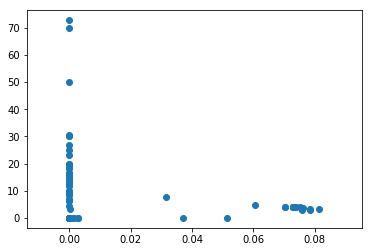

In [4]:
g = sn.load_graph('graphs/1965.gml')
sg = g.copy()

nodes = list(sg.nodes)

for n in nodes:
    if sg.nodes[n]['sessions'] < 10:
        sg.remove_node(n)
        
write_coreness(sg)

coreness = []
proportion_of_innovation = []
for n in sg.nodes:
        coreness.append(sg.nodes[n]['coreness'])
        if sg.nodes[n]['innovats'] > 0:
            proportion_of_innovation.append((sg.nodes[n]['innovats']/sg.nodes[n]['sessions']) * 100)
        else:
             proportion_of_innovation.append(0)
plt.scatter(coreness,proportion_of_innovation)
plt.show()

In [5]:
import numpy as np
res = {}
for i in range(0,len(coreness)):

    number = round(coreness[i],5)
        
    if number not in res:
        res[number]  = [proportion_of_innovation[i],1]
    else:
         res[number][0] += proportion_of_innovation[i]
         res[number][1] += 1

x = []
y = []
for i in res:
    x.append(i)
    y.append(res[i][0]/res[i][1])
    


    
        

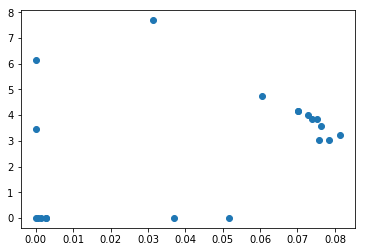

In [6]:
regression = np.polyfit(x,y,7)
plt.plot(x,y,'o')
#plt.plot(regression)
plt.show()

/home/hugo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RankWarning:

Polyfit may be poorly conditioned



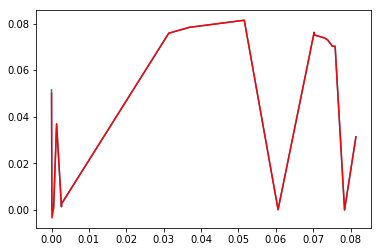

In [7]:
new_x = x.copy()
new_x.sort()
new_y = [a for _, a in sorted(zip(y,x), key=lambda pair: pair[0])]

regression = np.polyfit(new_x,new_y,100)

plt.plot(new_x,new_y)
plt.plot(new_x,np.polyval(regression,new_x),'r-')
plt.show()

In [8]:
print(np.abs(pearsonr(new_x,new_y))[0])

0.52174518043499


# Conclusion between years

In [9]:
years_x = []
years_y = []
year_counter = 1950
while(year_counter <= 1960):
    years_x.append(year_counter)
    g = sn.load_graph('graphs/{0}.gml'.format(year_counter))
    sg = g.copy()

    nodes = list(sg.nodes)

    for n in nodes:
        if sg.nodes[n]['sessions'] < 10:
            sg.remove_node(n)

    write_coreness(sg)
    print('Coreness do ano {0} feito'.format(year_counter))

    coreness = []
    proportion_of_innovation = []
    for n in sg.nodes:
            coreness.append(sg.nodes[n]['coreness'])
            if sg.nodes[n]['innovats'] > 0:
                proportion_of_innovation.append((sg.nodes[n]['innovats']/sg.nodes[n]['sessions']) * 100)
            else:
                 proportion_of_innovation.append(0)

    res = {}
    for i in range(0,len(coreness)):
        number = round(coreness[i],5)

        if number not in res:
            res[number]  = [proportion_of_innovation[i],1]
        else:
             res[number][0] += proportion_of_innovation[i]
             res[number][1] += 1
    x = []
    y = []
    for i in res:
        x.append(i)
        y.append(res[i][0]/res[i][1])

    new_x = x.copy()
    new_x.sort()
    new_y = [a for _, a in sorted(zip(y,x), key=lambda pair: pair[0])]
    corr = np.abs(pearsonr(new_x,new_y))[0]
    years_y.append(corr)
    year_counter +=1


Coreness do ano 1950 feito
Coreness do ano 1951 feito
Coreness do ano 1952 feito
Coreness do ano 1953 feito
Coreness do ano 1954 feito
Coreness do ano 1955 feito
Coreness do ano 1956 feito
Coreness do ano 1957 feito
Coreness do ano 1958 feito
Coreness do ano 1959 feito
Coreness do ano 1960 feito


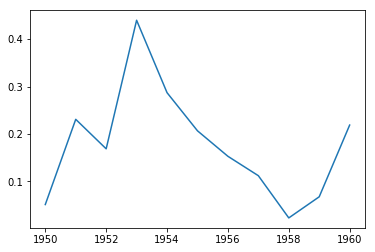

In [10]:
plt.plot(years_x,years_y)
plt.show()

In [11]:
years_x = []
years_y = []
year_counter = 1950
while(year_counter <= 1960):
    years_x.append(year_counter)
    g = sn.load_graph('graphs/{0}.gml'.format(year_counter))
    sg = g.copy()

    nodes = list(sg.nodes)

    for n in nodes:
        if sg.nodes[n]['sessions'] < 10:
            sg.remove_node(n)

    write_coreness(sg)
    print('Coreness do ano {0} feito'.format(year_counter))

    coreness = []
    proportion_of_innovation = []
    for n in sg.nodes:
            coreness.append(sg.nodes[n]['coreness'])
            if sg.nodes[n]['innovats'] > 0:
                proportion_of_innovation.append(sg.nodes[n]['innovats'])
            else:
                 proportion_of_innovation.append(0)

    res = {}
    for i in range(0,len(coreness)):
        number = round(coreness[i],5)

        if number not in res:
            res[number]  = [proportion_of_innovation[i],1]
        else:
             res[number][0] += proportion_of_innovation[i]
             res[number][1] += 1
    x = []
    y = []
    for i in res:
        x.append(i)
        y.append(res[i][0]/res[i][1])

    new_x = x.copy()
    new_x.sort()
    new_y = [a for _, a in sorted(zip(y,x), key=lambda pair: pair[0])]
    corr = np.abs(pearsonr(new_x,new_y))[0]
    years_y.append(corr)
    year_counter +=1


Coreness do ano 1950 feito
Coreness do ano 1951 feito
Coreness do ano 1952 feito
Coreness do ano 1953 feito
Coreness do ano 1954 feito
Coreness do ano 1955 feito
Coreness do ano 1956 feito
Coreness do ano 1957 feito
Coreness do ano 1958 feito
Coreness do ano 1959 feito
Coreness do ano 1960 feito


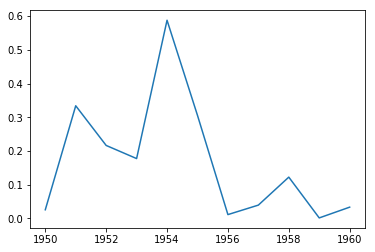

In [12]:
plt.plot(years_x,years_y)
plt.show()